  <a href="https://colab.research.google.com/github/marcpalo1999/MIA_sanidad/blob/main/2_1_introduccion_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Setup - copy data from github to collab

In [ ]:
import os
if not os.path.exists('/content/MIA_sanidad'):
    !git clone https://github.com/marcpalo1999/MIA_sanidad.git
os.chdir('/content/MIA_sanidad')
os.getcwd()


  # Introducción a Pandas con un Dataset Médico



  En este notebook vamos a aprender a usar `pandas` para:



  1. Cargar un dataset en un DataFrame

  2. Inspeccionar datos (ver filas, columnas, tipos)

  3. Seleccionar y filtrar datos

  4. Crear y transformar columnas

  5. Hacer una exploración inicial básica

  6. Trabajar con valores nulos

  7. Agrupar y resumir información

  8. Visualización básica con pandas

  9. Guardar los resultados

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
# Cargar el dataset
df = pd.read_csv("./data/heart_disease_dataset.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


  ## Contexto del dataset



  Origen: https://archive.ics.uci.edu/dataset/45/heart+disease



  Este dataset contiene información médica de pacientes y su relación con enfermedades cardíacas.

  Las principales variables son:



  - `age`: Edad del paciente

  - `sex`: Sexo (0 = Mujer, 1 = Hombre)

  - `cp`: Tipo de dolor en el pecho (1-4)

  - `trestbps`: Presión arterial en reposo (mm Hg)

  - `chol`: Colesterol sérico en mg/dl

  - `fbs`: Glucosa en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)

  - `restecg`: Resultados electrocardiográficos en reposo

  - `thalach`: Frecuencia cardíaca máxima alcanzada

  - `exang`: Angina inducida por ejercicio (1 = sí; 0 = no)

  - `oldpeak`: Depresión ST inducida por ejercicio

  - `slope`: Pendiente del segmento ST

  - `ca`: Número de vasos principales coloreados por fluoroscopia (0-3)

  - `thal`: 3 = normal; 6 = defecto fijo; 7 = defecto reversible

  - `num`: Diagnóstico de enfermedad cardíaca (0 = No, 1-4 = Sí)

  ## 1. Inspección básica del DataFrame



  Lo primero que hacemos siempre es conocer nuestros datos.

In [68]:
# Ver las primeras filas
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [69]:
# También podemos ver las últimas filas
df.tail(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [70]:
# Ver una muestra aleatoria de datos
df.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
10,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
80,45,1,4,104,208,0,2,148,1,3.0,2,0.0,3.0,0
147,41,1,3,112,250,0,0,179,0,0.0,1,0.0,3.0,0
293,63,1,4,140,187,0,2,144,1,4.0,1,2.0,7.0,2
288,56,1,2,130,221,0,2,163,0,0.0,1,0.0,7.0,0


In [71]:
# Dimensiones del DataFrame
df.shape


(303, 14)

In [72]:
f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas"


'El dataset tiene 303 filas y 14 columnas'

In [73]:
# Ver los nombres de las columnas
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [74]:
# Tipos de datos de cada columna
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [75]:
# Información general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [76]:
# Resumen estadístico rápido
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [77]:
# También podemos incluir variables categóricas
df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


  ## 2. Seleccionar columnas y filas



  Pandas ofrece varias formas de acceder a los datos.

In [78]:
# Seleccionar una columna (devuelve una Serie)
df["age"].head(10)


0    63
1    67
2    67
3    37
4    41
5    56
6    62
7    57
8    63
9    53
Name: age, dtype: int64

In [79]:
# Otra forma de seleccionar una columna (notación de punto)
df.chol.head()


0    233
1    286
2    229
3    250
4    204
Name: chol, dtype: int64

In [80]:
# Seleccionar varias columnas (devuelve un DataFrame)
subset = df[["age", "sex", "chol", "num"]]
subset.head()


,age,sex,chol,num
0,63,1,233,0
1,67,1,286,2
2,67,1,229,1
3,37,1,250,0
4,41,0,204,0


In [81]:
# Seleccionar filas por posición con iloc
df.iloc[0]


age          63.0
sex           1.0
cp            1.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       2.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         3.0
ca            0.0
thal          6.0
num           0.0
Name: 0, dtype: float64

In [82]:
# Seleccionar un rango de filas
df.iloc[5:10]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [83]:
# Seleccionar filas y columnas específicas con iloc
df.iloc[0:3, 0:4]


,age,sex,cp,trestbps
0,63,1,1,145
1,67,1,4,160
2,67,1,4,120


In [84]:
# Seleccionar con loc usando etiquetas
df.loc[0:2, ["age", "sex", "chol"]]


,age,sex,chol
0,63,1,233
1,67,1,286
2,67,1,229


  ## 3. Filtrar datos



  Una de las operaciones más comunes es filtrar filas según condiciones.

In [85]:
# Filtrar pacientes mayores de 60 años
mayores_60 = df[df["age"] > 60]
len(mayores_60)


79

In [86]:
mayores_60.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [87]:
# Filtrar con múltiples condiciones - Mujeres mayores de 50 años
mujeres_mayores = df[(df["sex"] == 0) & (df["age"] > 50)]
len(mujeres_mayores)


70

In [88]:
mujeres_mayores.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
21,58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
26,58,0,3,120,340,0,0,172,0,0.0,1,0.0,3.0,0


In [26]:
# Usar el operador OR (|) - Pacientes con colesterol alto o presión alta
alto_riesgo = df[(df["chol"] > 240) | (df["trestbps"] > 140)]
len(alto_riesgo)


181

In [27]:
# Filtrar usando isin() para múltiples valores
dolor_especifico = df[df["cp"].isin([1, 2])]
len(dolor_especifico)


73

In [28]:
# Filtrar usando query() - más legible para condiciones complejas
resultado = df.query("age > 50 and chol > 200 and sex == 1")
len(resultado)


120

In [29]:
resultado.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


  ## 4. Crear y modificar columnas



  Es común necesitar crear nuevas variables o transformar las existentes.

In [30]:
# Crear una columna simple
df["edad_en_meses"] = df["age"] * 12
df[["age", "edad_en_meses"]].head()


,age,edad_en_meses
0,63,756
1,67,804
2,67,804
3,37,444
4,41,492


In [31]:
# Crear columna con operaciones entre columnas
df["indice_riesgo"] = df["chol"] / df["age"]
df[["age", "chol", "indice_riesgo"]].head()


,age,chol,indice_riesgo
0,63,233,3.698413
1,67,286,4.268657
2,67,229,3.417910
3,37,250,6.756757
4,41,204,4.975610


In [32]:
# Crear columna categórica basada en valores continuos
df["grupo_edad"] = pd.cut(df["age"], 
                          bins=[0, 40, 50, 60, 70, 100],
                          labels=["<40", "40-49", "50-59", "60-69", "70+"])
df["grupo_edad"].value_counts()


grupo_edad
50-59    130
40-49     76
60-69     73
<40       18
70+        6
Name: count, dtype: int64

In [33]:
# Usar apply() para transformaciones más complejas
def clasificar_colesterol(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor < 200:
        return "Normal"
    elif valor < 240:
        return "Límite alto"
    else:
        return "Alto"

df["categoria_colesterol"] = df["chol"].apply(clasificar_colesterol)
df["categoria_colesterol"].value_counts()


categoria_colesterol
Alto           156
Límite alto     98
Normal          49
Name: count, dtype: int64

In [34]:
# Crear columna usando numpy.where
df["sexo_texto"] = np.where(df["sex"] == 0, "Mujer", "Hombre")
df[["sex", "sexo_texto"]].head()


,sex,sexo_texto
0,1,Hombre
1,1,Hombre
2,1,Hombre
3,1,Hombre
4,0,Mujer


In [35]:
# Mapear valores usando un diccionario
mapeo_enfermedad = {0: "Sin enfermedad", 1: "Leve", 2: "Moderada", 3: "Severa", 4: "Muy severa"}
df["nivel_enfermedad"] = df["num"].map(mapeo_enfermedad)
df[["num", "nivel_enfermedad"]].head(10)


,num,nivel_enfermedad
0,0,Sin enfermedad
1,2,Moderada
2,1,Leve
3,0,Sin enfermedad
4,0,Sin enfermedad
5,0,Sin enfermedad
6,3,Severa
7,0,Sin enfermedad
8,2,Moderada
9,1,Leve


In [36]:
# Modificar columna existente - Normalizar el colesterol
df["chol_normalizado"] = (df["chol"] - df["chol"].min()) / (df["chol"].max() - df["chol"].min())
df[["chol", "chol_normalizado"]].describe()


,chol,chol_normalizado
count,303.000000,303.000000
mean,246.693069,0.275555
std,51.776918,0.118212
min,126.000000,0.000000
25%,211.000000,0.194064
50%,241.000000,0.262557
75%,275.000000,0.340183
max,564.000000,1.000000


  ## 5. Exploración y análisis básico



  Vamos a explorar los datos para entender mejor el dataset.

In [37]:
# Contar valores únicos en una columna
df["num"].value_counts()


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [38]:
# Porcentajes en lugar de conteos
df["num"].value_counts(normalize=True) * 100


num
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64

In [39]:
# Tabla cruzada entre dos variables
pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"])


nivel_enfermedad,Leve,Moderada,Muy severa,Severa,Sin enfermedad
sexo_texto,,,,,
Hombre,46,29,11,28,92
Mujer,9,7,2,7,72


In [40]:
# Tabla cruzada con porcentajes por fila
pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"], normalize=0) * 100


nivel_enfermedad,Leve,Moderada,Muy severa,Severa,Sin enfermedad
sexo_texto,,,,,
Hombre,22.330097,14.077670,5.339806,13.592233,44.660194
Mujer,9.278351,7.216495,2.061856,7.216495,74.226804


In [41]:
# Tabla cruzada con porcentajes por columna
pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"], normalize=1) * 100


nivel_enfermedad,Leve,Moderada,Muy severa,Severa,Sin enfermedad
sexo_texto,,,,,
Hombre,83.636364,80.555556,84.615385,80.0,56.097561
Mujer,16.363636,19.444444,15.384615,20.0,43.902439


  ## 6. Trabajar con valores nulos



  El manejo de valores faltantes es crucial en el análisis de datos.

In [42]:
# Detectar valores nulos
df.isnull().sum()


age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      4
thal                    2
num                     0
edad_en_meses           0
indice_riesgo           0
grupo_edad              0
categoria_colesterol    0
sexo_texto              0
nivel_enfermedad        0
chol_normalizado        0
dtype: int64

In [43]:
# Porcentaje de valores nulos
(df.isnull().sum() / len(df)) * 100


age                     0.000000
sex                     0.000000
cp                      0.000000
trestbps                0.000000
chol                    0.000000
fbs                     0.000000
restecg                 0.000000
thalach                 0.000000
exang                   0.000000
oldpeak                 0.000000
slope                   0.000000
ca                      1.320132
thal                    0.660066
num                     0.000000
edad_en_meses           0.000000
indice_riesgo           0.000000
grupo_edad              0.000000
categoria_colesterol    0.000000
sexo_texto              0.000000
nivel_enfermedad        0.000000
chol_normalizado        0.000000
dtype: float64

In [44]:
# Filas con algún valor nulo
filas_con_nulos = df[df.isnull().any(axis=1)]
len(filas_con_nulos)


6

In [45]:
filas_con_nulos.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,edad_en_meses,indice_riesgo,grupo_edad,categoria_colesterol,sexo_texto,nivel_enfermedad,chol_normalizado
87,53,0,3,128,216,0,2,115,0,0.0,...,0.0,NaN,0,636,4.075472,50-59,Límite alto,Mujer,Sin enfermedad,0.205479
166,52,1,3,138,223,0,0,169,0,0.0,...,NaN,3.0,0,624,4.288462,50-59,Límite alto,Hombre,Sin enfermedad,0.221461
192,43,1,4,132,247,1,2,143,1,0.1,...,NaN,7.0,1,516,5.744186,40-49,Alto,Hombre,Leve,0.276256
266,52,1,4,128,204,1,0,156,1,1.0,...,0.0,NaN,2,624,3.923077,50-59,Límite alto,Hombre,Moderada,0.178082
287,58,1,2,125,220,0,0,144,0,0.4,...,NaN,7.0,0,696,3.793103,50-59,Límite alto,Hombre,Sin enfermedad,0.214612


In [46]:
# Crear una copia para no modificar el original
df_limpio = df.copy()

# Eliminar filas con nulos
df_sin_nulos = df_limpio.dropna()
f"Filas antes: {len(df_limpio)}, después: {len(df_sin_nulos)}"


'Filas antes: 303, después: 297'

In [47]:
# Diferentes estrategias para rellenar nulos

# Rellenar con un valor específico
df_limpio["ca"] = df_limpio["ca"].fillna(0)

# Rellenar con la media (para variables numéricas)
df_limpio["thal"] = df_limpio["thal"].fillna(df_limpio["thal"].mean())

# Rellenar con la moda (para categóricas)
df_limpio["slope"] = df_limpio["slope"].fillna(df_limpio["slope"].mode()[0])

df_limpio.isnull().sum()


age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      0
thal                    0
num                     0
edad_en_meses           0
indice_riesgo           0
grupo_edad              0
categoria_colesterol    0
sexo_texto              0
nivel_enfermedad        0
chol_normalizado        0
dtype: int64

  ## 7. Agrupar y resumir datos



  La agrupación es fundamental para obtener estadísticas por categorías.

In [48]:
# Agrupar por una variable y calcular media
df.groupby("sexo_texto")["age"].mean()


sexo_texto
Hombre    53.834951
Mujer     55.721649
Name: age, dtype: float64

In [49]:
# Múltiples estadísticas a la vez
df.groupby("sexo_texto")["chol"].agg(["mean", "median", "std", "min", "max"])


,mean,median,std,min,max
sexo_texto,,,,,
Hombre,239.601942,235.0,42.649757,126,353
Mujer,261.752577,254.0,64.900891,141,564


In [50]:
# Agrupar por múltiples variables
grupo = df.groupby(["sexo_texto", "nivel_enfermedad"])["age"].mean()
grupo.round(1)


sexo_texto  nivel_enfermedad
Hombre      Leve                54.4
            Moderada            58.7
            Muy severa          58.9
            Severa              55.0
            Sin enfermedad      51.0
Mujer       Leve                60.3
            Moderada            55.3
            Muy severa          64.0
            Severa              59.9
            Sin enfermedad      54.6
Name: age, dtype: float64

  ## 8. Visualización básica con pandas



  Pandas tiene capacidades de visualización integradas útiles para exploración rápida.

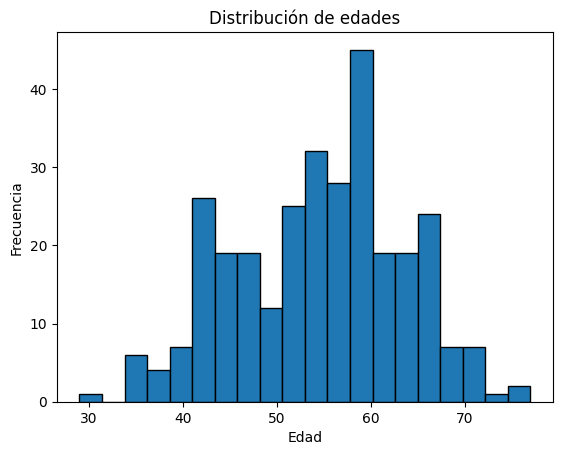

In [51]:
# Histograma simple
df["age"].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


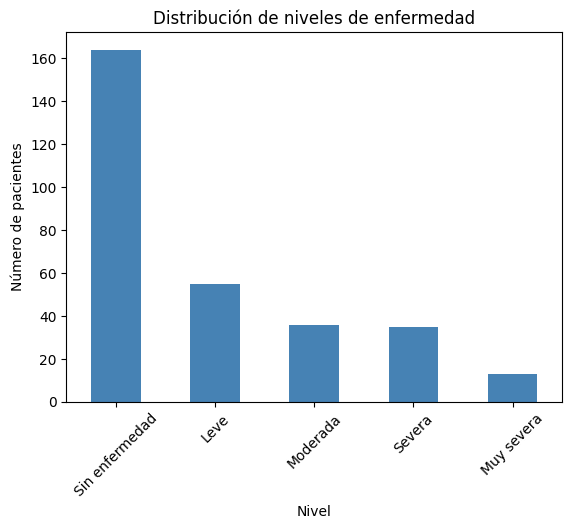

In [52]:
# Gráfico de barras
df["nivel_enfermedad"].value_counts().plot(kind='bar', color='steelblue')
plt.title("Distribución de niveles de enfermedad")
plt.xlabel("Nivel")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45)
plt.show()


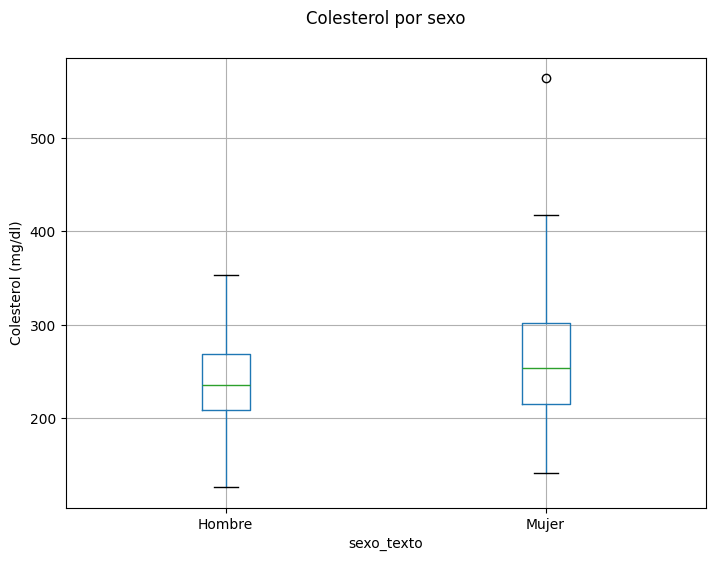

In [53]:
# Box plot para ver distribución y outliers
df.boxplot(column='chol', by='sexo_texto', figsize=(8, 6))
plt.suptitle("Colesterol por sexo")
plt.title("")
plt.ylabel("Colesterol (mg/dl)")
plt.show()


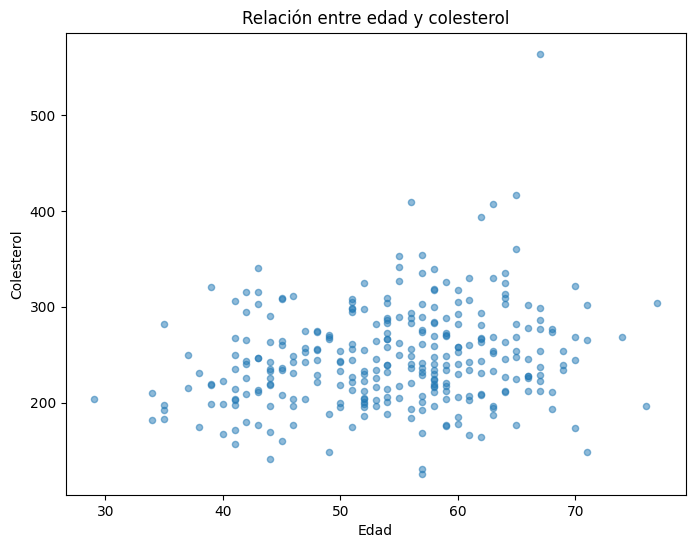

In [54]:
# Scatter plot para ver relaciones
df.plot(kind='scatter', x='age', y='chol', alpha=0.5, figsize=(8, 6))
plt.title("Relación entre edad y colesterol")
plt.xlabel("Edad")
plt.ylabel("Colesterol")
plt.show()


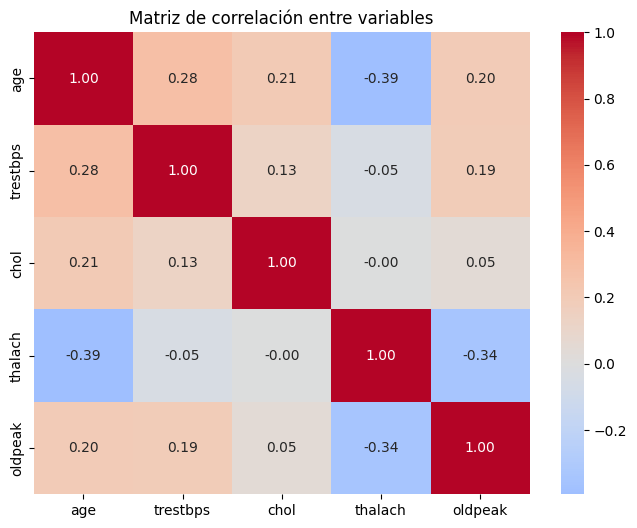

In [55]:
# Matriz de correlación con heatmap
correlacion = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables")
plt.show()


/var/folders/hj/z81bpvv52rxg939nrr4_8qp00000gn/T/ipykernel_84191/4028355435.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby("grupo_edad")["chol"].mean().sort_index()


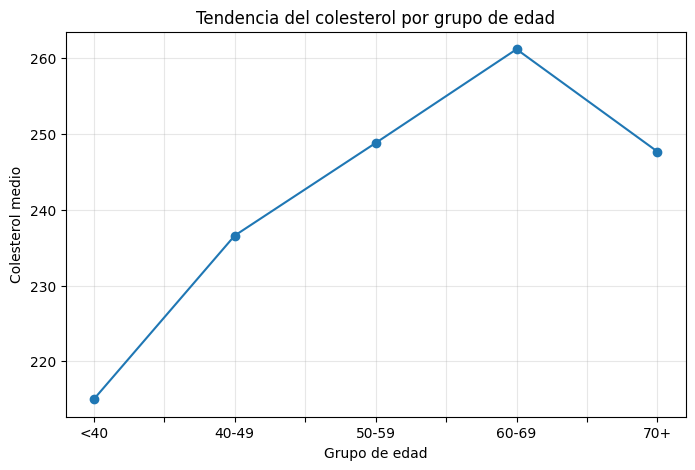

In [56]:
# Gráfico de líneas para tendencias
tendencia = df.groupby("grupo_edad")["chol"].mean().sort_index()
tendencia.plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Tendencia del colesterol por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Colesterol medio")
plt.grid(True, alpha=0.3)
plt.show()


  ## 9. Guardar los resultados



  Después de procesar los datos, necesitamos guardar los resultados.

In [57]:
# Guardar el DataFrame modificado en CSV
df_limpio.to_csv("heart_disease_procesado.csv", index=False)
"Archivo guardado como 'heart_disease_procesado.csv'"


"Archivo guardado como 'heart_disease_procesado.csv'"

In [58]:
# Guardar solo columnas específicas
columnas_importantes = ["age", "sexo_texto", "chol", "categoria_colesterol", "nivel_enfermedad"]
df[columnas_importantes].to_csv("heart_disease_resumido.csv", index=False)
"Archivo resumido guardado"


'Archivo resumido guardado'

In [59]:
# Guardar tabla de resumen
resumen_sexo = df.groupby("sexo_texto").agg({
    "age": ["mean", "std"],
    "chol": ["mean", "std"],
    "num": lambda x: (x > 0).mean() * 100  # Porcentaje de enfermos
})
resumen_sexo.round(1)


age        chol            num
            mean  std   mean   std <lambda>
sexo_texto                                 
Hombre      53.8  8.8  239.6  42.6     55.3
Mujer       55.7  9.4  261.8  64.9     25.8

In [60]:
resumen_sexo.to_csv("resumen_por_sexo.csv")
"Tabla de resumen guardada"


'Tabla de resumen guardada'

  ## Ejercicios propuestos



  1. **Análisis de presión arterial**: Crea una nueva columna que clasifique la presión arterial (`trestbps`) en las siguientes categorías:

     - "Normal": menor a 120

     - "Elevada": entre 120 y 129

     - "Hipertensión Etapa 1": entre 130 y 139

     - "Hipertensión Etapa 2": 140 o más



     Luego calcula qué porcentaje de pacientes está en cada categoría.



  2. **Análisis por sexo**:

     - Calcula la media y desviación estándar del colesterol para hombres y mujeres por separado

     - Determina qué sexo tiene mayor proporción de pacientes con enfermedad cardíaca

     - Crea un gráfico comparativo



  3. **Identificación de pacientes de alto riesgo**:

     - Crea un índice de riesgo que combine edad > 55, colesterol > 240, y presión > 140

     - Identifica cuántos pacientes cumplen con al menos 2 de estos criterios

     - Guarda la lista de pacientes de alto riesgo en un archivo separado



  4. **Análisis de correlaciones**:

     - Investiga qué variables están más correlacionadas con la presencia de enfermedad (`num`)

     - Crea visualizaciones para las 3 correlaciones más fuertes



  5. **Limpieza de datos avanzada**:

     - Identifica posibles valores atípicos (outliers) en colesterol y presión arterial

     - Decide qué hacer con ellos (mantener, eliminar, o transformar)

     - Justifica tu decisión

In [61]:
# Ejemplo de solución para el ejercicio 1
def clasificar_presion(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor < 120:
        return "Normal"
    elif valor < 130:
        return "Elevada"
    elif valor < 140:
        return "Hipertensión Etapa 1"
    else:
        return "Hipertensión Etapa 2"

df["categoria_presion"] = df["trestbps"].apply(clasificar_presion)
df["categoria_presion"].value_counts()


categoria_presion
Hipertensión Etapa 2    98
Elevada                 75
Hipertensión Etapa 1    70
Normal                  60
Name: count, dtype: int64

In [62]:
# Porcentajes
df["categoria_presion"].value_counts(normalize=True) * 100


categoria_presion
Hipertensión Etapa 2    32.343234
Elevada                 24.752475
Hipertensión Etapa 1    23.102310
Normal                  19.801980
Name: proportion, dtype: float64

  ## Resumen



  En este notebook hemos cubierto las operaciones fundamentales de pandas:



  - **Carga y exploración inicial**: Entender la estructura y contenido de los datos

  - **Selección y filtrado**: Acceder a subconjuntos específicos de datos

  - **Transformación**: Crear nuevas variables y modificar existentes

  - **Análisis estadístico**: Calcular métricas y encontrar patrones

  - **Agrupación**: Resumir datos por categorías

  - **Visualización**: Crear gráficos para entender mejor los datos

  - **Exportación**: Guardar los resultados del análisis



  Estos conceptos forman la base para cualquier análisis de datos con Python y pandas. La práctica constante con diferentes datasets te ayudará a dominar estas herramientas.

In [63]:
# Example of confusion matrix demonstration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def create_cancer_screening_example(
    population=10000,
    prevalence=0.005,  # 0.5% prevalence
    sensitivity=0.90,   # 90% sensitivity (true positive rate)
    specificity=0.95    # 95% specificity (true negative rate)
):
    """
    Generate synthetic confusion matrix for cancer screening
    with low prevalence to demonstrate metric importance
    """
    
    # Calculate population splits
    n_cancer = int(population * prevalence)
    n_healthy = population - n_cancer
    
    # Display basic info
    info_str = f"""EJEMPLO: Screening de Cáncer de Páncreas
{'='*50}
Población total: {population:,} pacientes
Prevalencia: {prevalence*100:.1f}% ({n_cancer} casos reales)
Pacientes sanos: {n_healthy:,}

Características del test:
Sensibilidad objetivo: {sensitivity*100:.0f}%
Especificidad objetivo: {specificity*100:.0f}%
"""
    
    # Calculate confusion matrix values
    true_positive = int(n_cancer * sensitivity)
    false_negative = n_cancer - true_positive
    true_negative = int(n_healthy * specificity)
    false_positive = n_healthy - true_negative
    
    # Create confusion matrix
    cm = np.array([[true_positive, false_positive],
                   [false_negative, true_negative]])
    
    # Display formatted confusion matrix
    cm_str = f"""
MATRIZ DE CONFUSIÓN:
{'='*50}

                    Predicción
              Cáncer    No Cáncer    Total
Realidad
Cáncer         {true_positive:5d}      {false_negative:5d}     {n_cancer:5d}
No Cáncer      {false_positive:5d}      {true_negative:5d}     {n_healthy:5d}
Total          {true_positive+false_positive:5d}      {false_negative+true_negative:5d}    {population:5d}
"""
    
    # Calculate metrics
    accuracy = (true_positive + true_negative) / population
    sensitivity_calc = true_positive / n_cancer if n_cancer > 0 else 0
    specificity_calc = true_negative / n_healthy if n_healthy > 0 else 0
    ppv = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    npv = true_negative / (true_negative + false_negative) if (true_negative + false_negative) > 0 else 0
    f1 = 2 * (ppv * sensitivity_calc) / (ppv + sensitivity_calc) if (ppv + sensitivity_calc) > 0 else 0
    
    metrics_str = f"""
{'='*50}
MÉTRICAS DE EVALUACIÓN:
{'='*50}

✓ Accuracy: {accuracy*100:.1f}%
  → Parece excelente, ¿verdad?

✓ Sensibilidad (Recall): {sensitivity_calc*100:.1f}%
  → Detectamos {true_positive} de {n_cancer} cánceres
  → Perdemos {false_negative} pacientes con cáncer

✓ Especificidad: {specificity_calc*100:.1f}%
  → Identificamos correctamente {true_negative:,} de {n_healthy:,} sanos
  → Generamos {false_positive} falsas alarmas

✓ Valor Predictivo Positivo (Precision): {ppv*100:.1f}%
  → Solo {true_positive} de {true_positive+false_positive} 'positivos' tienen cáncer
  → ¡{(1-ppv)*100:.1f}% son falsas alarmas!

✓ Valor Predictivo Negativo: {npv*100:.2f}%
  → Si el test es negativo, casi seguro no hay cáncer

✓ F1-Score: {f1*100:.1f}%
  → Balance entre precision y recall
"""
    
    # Comparison with naive classifier
    naive_accuracy = n_healthy / population
    comparison_str = f"""
{'='*50}
COMPARACIÓN CON CLASIFICADOR NAIVE:
{'='*50}

Si el modelo siempre predice 'No Cáncer':
• Accuracy: {naive_accuracy*100:.1f}%
• Sensibilidad: 0% (no detecta ningún cáncer)
• Especificidad: 100%

→ ¡Accuracy del {naive_accuracy*100:.1f}% pero completamente inútil!
"""
    
    # Clinical impact
    clinical_str = f"""
{'='*50}
IMPACTO CLÍNICO:
{'='*50}

• Por cada caso real de cáncer detectado:
  → Se generan {false_positive/true_positive:.1f} falsas alarmas

• De {true_positive+false_positive} pruebas positivas:
  → {false_positive} pacientes sufrirán ansiedad innecesaria
  → {false_positive} posibles biopsias innecesarias

• De {n_cancer} casos reales de cáncer:
  → {false_negative} no serán detectados (potencialmente fatal)
"""
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Model confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predice:\nCáncer', 'Predice:\nNo Cáncer'],
                yticklabels=['Real:\nCáncer', 'Real:\nNo Cáncer'],
                ax=axes[0,0], cbar_kws={'label': 'Número de casos'},
                annot_kws={'size': 14})
    axes[0,0].set_title('Modelo ML Entrenado - Matriz de Confusión', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Realidad', fontsize=12)
    axes[0,0].set_xlabel('Predicción', fontsize=12)
    
    # Model metrics
    metrics_names = ['Accuracy', 'Sensibilidad', 'Especificidad', 'VPP', 'VPN', 'F1-Score']
    metrics_values = [accuracy*100, sensitivity_calc*100, specificity_calc*100, 
                     ppv*100, npv*100, f1*100]
    colors = ['green' if v > 90 else 'orange' if v > 50 else 'red' for v in metrics_values]
    
    bars1 = axes[0,1].barh(metrics_names, metrics_values, color=colors, alpha=0.7)
    axes[0,1].set_title('Modelo ML Entrenado - Métricas', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Porcentaje (%)', fontsize=12)
    axes[0,1].set_xlim(0, 105)
    
    for bar, value in zip(bars1, metrics_values):
        axes[0,1].text(value + 1, bar.get_y() + bar.get_height()/2, 
                      f'{value:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')
    
    # Naive model confusion matrix
    cm_naive = np.array([[0, 0], [n_cancer, n_healthy]])
    
    sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Reds', 
                xticklabels=['Predice:\nCáncer', 'Predice:\nNo Cáncer'],
                yticklabels=['Real:\nCáncer', 'Real:\nNo Cáncer'],
                ax=axes[1,0], cbar_kws={'label': 'Número de casos'},
                annot_kws={'size': 14})
    axes[1,0].set_title('Modelo Naive (siempre "No Cáncer") - Matriz de Confusión', 
                        fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Realidad', fontsize=12)
    axes[1,0].set_xlabel('Predicción', fontsize=12)
    
    # Naive metrics
    naive_values = [naive_accuracy*100, 0, 100, 0, n_healthy/(n_healthy+n_cancer)*100, 0]
    colors_naive = ['orange' if v > 90 else 'red' if v > 50 else 'darkred' for v in naive_values]
    
    bars2 = axes[1,1].barh(metrics_names, naive_values, color=colors_naive, alpha=0.7)
    axes[1,1].set_title('Modelo Naive (siempre "No Cáncer") - Métricas', 
                        fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Porcentaje (%)', fontsize=12)
    axes[1,1].set_xlim(0, 105)
    
    for bar, value in zip(bars2, naive_values):
        if value > 0:
            axes[1,1].text(value + 1, bar.get_y() + bar.get_height()/2, 
                          f'{value:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')
        else:
            axes[1,1].text(2, bar.get_y() + bar.get_height()/2, 
                          '0%', ha='left', va='center', fontsize=11, fontweight='bold', color='darkred')
    
    plt.suptitle(f'¿Por qué Accuracy no es suficiente?\nCáncer con prevalencia {prevalence*100:.1f}%', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Final comparison
    final_str = f"""
{'='*60}
COMPARACIÓN CRÍTICA:
{'='*60}
Modelo ML:    Accuracy={accuracy*100:.1f}%, Detecta {true_positive}/{n_cancer} cánceres
Modelo Naive: Accuracy={naive_accuracy:.1f}%, Detecta 0/{n_cancer} cánceres

→ ¡El modelo naive tiene mayor accuracy pero es inútil!
→ No detecta ningún cáncer (sensibilidad = 0%)
"""
    
    # Return all strings for display
    return (info_str + cm_str + metrics_str + comparison_str + 
            clinical_str + final_str), cm, {
        'accuracy': accuracy,
        'sensitivity': sensitivity_calc,
        'specificity': specificity_calc,
        'ppv': ppv,
        'npv': npv,
        'f1': f1
    }

# Bonus demonstration: Why accuracy isn't enough
"Ejecutando demostración de por qué accuracy no es suficiente..."


'Ejecutando demostración de por qué accuracy no es suficiente...'

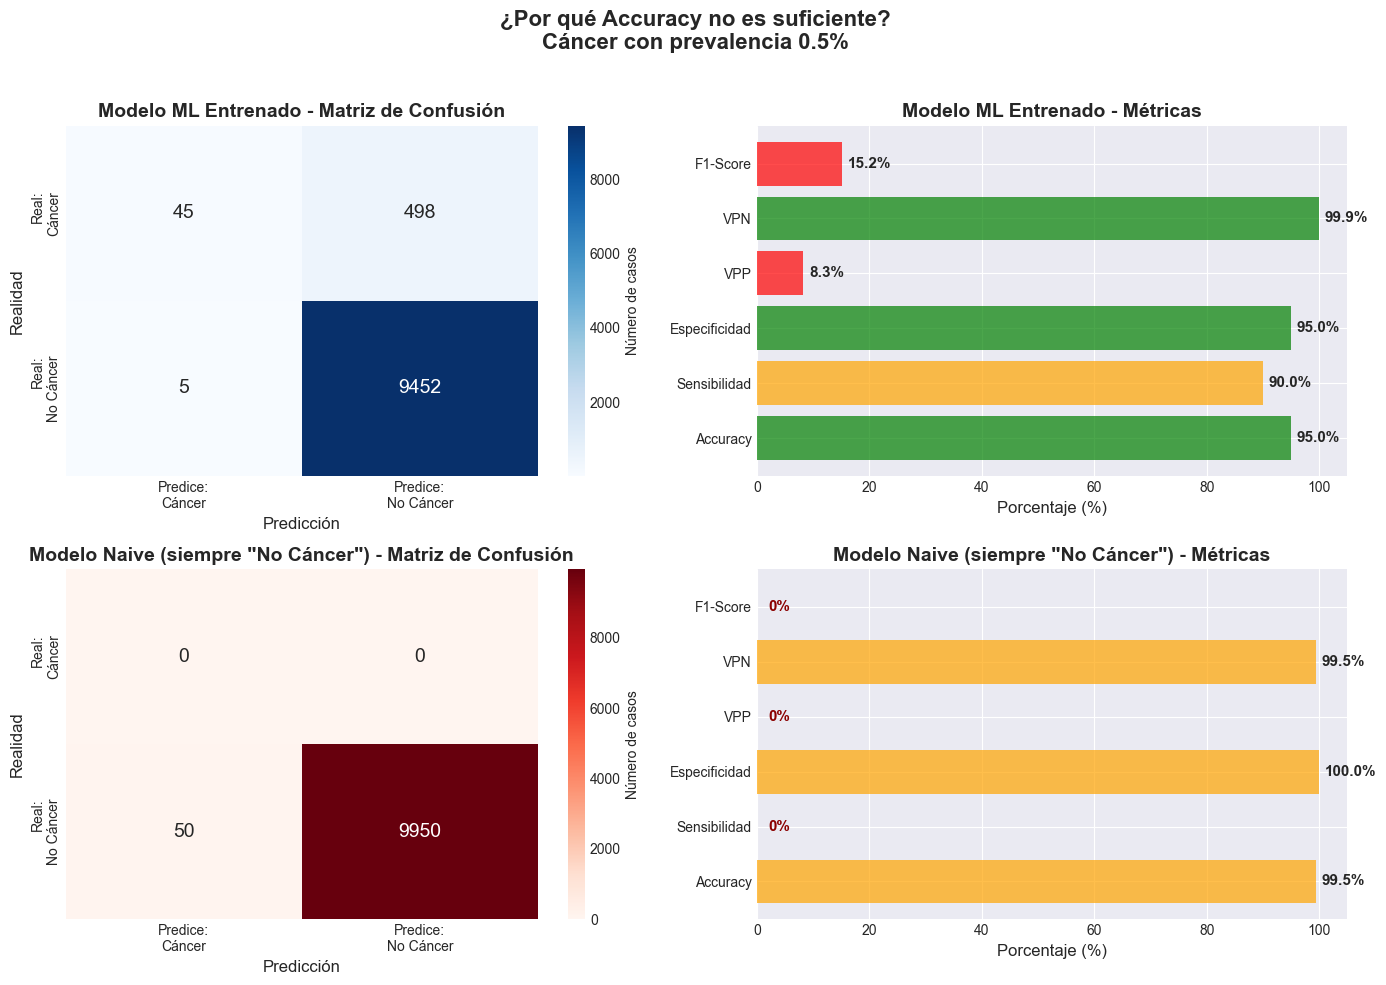

In [64]:
# Generate and display the cancer screening example
result_text, cm, metrics = create_cancer_screening_example()


In [65]:
# Show threshold comparison
def compare_thresholds():
    """Show how different thresholds affect metrics"""
    scenarios = [
        ("Conservador (umbral alto)", 0.70, 0.99),
        ("Balanceado (umbral medio)", 0.90, 0.95),
        ("Agresivo (umbral bajo)", 0.99, 0.80)
    ]
    
    results = []
    for name, sens, spec in scenarios:
        tp = int(50 * sens)
        fn = 50 - tp
        tn = int(9950 * spec)
        fp = 9950 - tn
        
        acc = (tp + tn) / 10000
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
        
        results.append({
            'Escenario': name,
            'Sensibilidad': f"{sens*100:.0f}%",
            'Especificidad': f"{spec*100:.0f}%",
            'Detecta_Cancer': f"{tp}/50",
            'Falsas_Alarmas': fp,
            'VPP': f"{ppv*100:.1f}%"
        })
    
    return pd.DataFrame(results)

compare_thresholds()


,Escenario,Sensibilidad,Especificidad,Detecta_Cancer,Falsas_Alarmas,VPP
0,Conservador (umbral alto),70%,99%,35/50,100,25.9%
1,Balanceado (umbral medio),90%,95%,45/50,498,8.3%
2,Agresivo (umbral bajo),99%,80%,49/50,1990,2.4%


In [66]:
# Key takeaways for students
takeaways = """
PUNTOS CLAVE APRENDIDOS EN ESTE NOTEBOOK:

📊 PANDAS FUNDAMENTALS:
• Cargar, explorar y entender datasets médicos
• Seleccionar, filtrar y transformar datos eficientemente
• Crear nuevas variables y categorías
• Manejar valores nulos apropiadamente
• Agrupar y resumir información por categorías
• Visualizar patrones en los datos
• Exportar resultados para uso posterior

🏥 APLICACIÓN MÉDICA:
• Análisis de factores de riesgo cardiovascular
• Categorización de pacientes por variables clínicas
• Identificación de patrones en datos de salud
• Creación de índices de riesgo personalizados

📈 MÉTRICAS Y EVALUACIÓN:
• Por qué accuracy puede ser engañoso
• Importancia de sensibilidad vs especificidad
• Valor predictivo positivo en screening
• Impacto clínico de falsos positivos/negativos

🔧 PRÓXIMOS PASOS:
• Practicar con otros datasets médicos
• Explorar visualizaciones más avanzadas
• Aprender técnicas de machine learning
• Desarrollar dashboards interactivos
"""

takeaways

'\nPUNTOS CLAVE APRENDIDOS EN ESTE NOTEBOOK:\n\n📊 PANDAS FUNDAMENTALS:\n• Cargar, explorar y entender datasets médicos\n• Seleccionar, filtrar y transformar datos eficientemente\n• Crear nuevas variables y categorías\n• Manejar valores nulos apropiadamente\n• Agrupar y resumir información por categorías\n• Visualizar patrones en los datos\n• Exportar resultados para uso posterior\n\n🏥 APLICACIÓN MÉDICA:\n• Análisis de factores de riesgo cardiovascular\n• Categorización de pacientes por variables clínicas\n• Identificación de patrones en datos de salud\n• Creación de índices de riesgo personalizados\n\n📈 MÉTRICAS Y EVALUACIÓN:\n• Por qué accuracy puede ser engañoso\n• Importancia de sensibilidad vs especificidad\n• Valor predictivo positivo en screening\n• Impacto clínico de falsos positivos/negativos\n\n🔧 PRÓXIMOS PASOS:\n• Practicar con otros datasets médicos\n• Explorar visualizaciones más avanzadas\n• Aprender técnicas de machine learning\n• Desarrollar dashboards interactivos\n'